1. 4개의 이미지 생성 및 로드 후 현재날짜 폴더에 저장. 
2. 이미지 전처리
3. 모델로 예측
4. 예측값 저장

0,1,2,3 = [그렇지 않다, 조금 그렇다, 그렇다, 매우 그렇다]

1. 샴푸 후 얼마 지나지  않아 당기고 가렵거나 따갑다
2. 머리를 하루만 감지 않아도 기름이 진다
3. 두피를 긁으면 쉽게 붉어진다
4. 두피에 뾰루지가 난다
5. 머리카락이 요즘들어 많이 빠진다
6. 머리 숱이 적어 진 것 같다

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#실행 후 runtime 다시 실행

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,233 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155501 files and d

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
survey = [0,2,2,2,1,1]

In [ ]:
frcnn = 1   #감지 되면 1, 안되면 0

In [ ]:
# 모듈 호출
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import requests
from datetime import datetime
import os
from datetime import date
import glob
import pandas as pd
import time
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'


In [ ]:
option = int(input('load image?(1), take image? (2) '))

load image?(1), take image? (2) 1


In [ ]:
today = date.today()
date = today.strftime('%y_%m_%d')
date

'22_04_22'

In [ ]:
img_path = '/content/drive/MyDrive/Final_Project/구세은/{}'.format(date)
img_path
os.makedirs(img_path, exist_ok=True)  #덮어쓰기 가능하려면  True
print("{} folder is created!".format(img_path))

/content/drive/MyDrive/Final_Project/구세은/22_04_22 folder is created!


In [ ]:
#4개의 이미지 (1, 2, 3, 4. jpg)  오늘 날짜 파일에 저장

if option == 2:
    cap = cv2.VideoCapture(0) # 영상을 읽어올 카메라 지정

    if not cap.isOpened(): # 카메라가 제대로 설정되지 않을 시 오류 메세지 출력
        print('video capture failed')
        sys.exit()

    while True: 
        ret, frame = cap.read() # 카메라를 통해 영상 읽어오기

        if not ret: # 영상 읽기 실패 시 오류 메세지 출력
            print('videos read failed')
            break

        cv2.imshow("camera",frame) # 창에 영상 표시 

        if cv2.waitKey(20) == ord('s'): # 's' 키를 입력 시 해당 시점의 영상을 저장
            img_counter = 1
            img_name = "{}.jpg".format(img_counter)
            cv2.imwrite(img_name, frame)
            print("{} written! ".format(img_name))
            img_counter += 1
            if img_counter == 5:
              break


        if cv2.waitKey(20) == 27:
            # ESC pressed
            print("Escape hit, closing...")
            break

    cap.release()
    cv2.destroyAllWindows() # 카메라 및 창 닫기
if option == 1:
    print('put 4 files in {} folder'.format(img_path))
else: 
    print("wrong input")
    option = int(input('load image?(1), take image? (2) '))

In [ ]:
images_path = glob.glob(img_path + '/*.jpg')
num_img = len(images_path)

if num_img != 4:
  raise Exception('Need 4 imges to process!!')
  raise UserWarning('Exit Early')
else:
  print('good to go')


good to go


In [ ]:
images_path

['/content/drive/MyDrive/Final_Project/구세은/22_04_22/4.jpg',
 '/content/drive/MyDrive/Final_Project/구세은/22_04_22/3.jpg',
 '/content/drive/MyDrive/Final_Project/구세은/22_04_22/1.jpg',
 '/content/drive/MyDrive/Final_Project/구세은/22_04_22/2.jpg']

In [ ]:
#img resize
for img in images_path:
  i = img[-5]
  img= cv2.imread(img)
  imgname = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 컬러타입을 RGB로 변경
  imgname= cv2.resize(img,(224,224))/255.0 # 입력값으로 쓰기위해 리사이즈 및 스케일링
  imgname = img.reshape((1,)+img.shape) # 입력값으로 형태 변경


# img = cv2.imread('/content/drive/MyDrive/Final_Project/Test/folliculitis/folliculitis_2/0617_A2LEBJJDE000815_1606535616973_2_TH.jpg') # 저장된 이미지 불러오기
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 컬러타입을 RGB로 변경
# img = cv2.resize(img,(224,224))/255.0 # 입력값으로 쓰기위해 리사이즈 및 스케일링
# img = img.reshape((1,)+img.shape) # 입력값으로 형태 변경

In [ ]:
model_path ='/content/drive/MyDrive/Final_Project/구세은/model'
glob.glob(model_path + '/*')

['/content/drive/MyDrive/Final_Project/구세은/model/dryscalp_resnet1.h5',
 '/content/drive/MyDrive/Final_Project/구세은/model/erythema_resnet.h5',
 '/content/drive/MyDrive/Final_Project/구세은/model/folliculitis_resnet.h5',
 '/content/drive/MyDrive/Final_Project/구세은/model/dandruff_resnet.h5',
 '/content/drive/MyDrive/Final_Project/구세은/model/oilyscalp_resnet.h5',
 '/content/drive/MyDrive/Final_Project/구세은/model/hairloss_resnet.h5']

In [ ]:
# def findKey(search_value):
#     for key, value in dic.items():
#         if(value == search_value):
#             return key
#     return -1

In [ ]:
def scalp_score(img_path, model_path):
  out = []
  img_folder_paths = glob.glob(img_path + '/*.jpg')
  model_paths = glob.glob(model_path + '/*')
  for i in img_folder_paths:
    
    
    for model in model_paths:
      model_name = model.split('/')[-1]
      model_name = model_name.split('_')[0]
      model = load_model(model, compile = False)  
      prediction =model.predict(image)
      max = np.argmax(prediction)
      out.append([image_name, model_name, max])
  out = pd.DataFrame(out, columns = ['image_name', 'model_name', 'predict'])
  return(out)


In [ ]:
start = time.time()
df = scalp_score(img_path, model_path)
end = time.time()
print(f'total time(s):{end-start}')

total time(s):309.5966830253601


In [ ]:
df

,image_name,model_name,predict
0,4,dryscalp,3
1,4,erythema,2
2,4,folliculitis,1
3,4,dandruff,3
4,4,oilyscalp,2
5,4,hairloss,2
6,3,dryscalp,3
7,3,erythema,2
8,3,folliculitis,3
9,3,dandruff,3


In [ ]:
mean = df.groupby(by='model_name').mean().reset_index()
mean = mean.set_index('model_name')
mean


,predict
model_name,
dandruff,3.0
dryscalp,3.0
erythema,2.0
folliculitis,2.5
hairloss,2.0
oilyscalp,2.0


fasterRCNN

In [ ]:
class WheatTestDataset(Dataset):

    def __init__(self, dataframe, image_dir, transforms=None):
        super().__init__()

        self.image_ids = dataframe['image_id'].unique()
        self.df = dataframe
        self.image_dir = image_dir
        self.transforms = transforms

    def __getitem__(self, index: int):

        image_id = self.image_ids[index]
        records = self.df[self.df['image_id'] == image_id]

        image = cv2.imread(f'{self.image_dir}/{image_id}.jpg', cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /= 255.0

        if self.transforms:
            sample = {
                'image': image,
            }
            sample = self.transforms(**sample)
            image = sample['image']

        return image, image_id

    def __len__(self) -> int:
        return self.image_ids.shape[0]

In [ ]:
DIR_TEST = './image'
WEIGHTS_FILE = './model/fasterrcnn_resnet50_fpn.pth'
path = './image/'

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
num_classes = 2  # 1 class (wheat) + background

# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Load the trained weights
model.load_state_dict(torch.load(WEIGHTS_FILE))
model.eval()

x = model.to(device)

test_dataset = WheatTestDataset(test_df, DIR_TEST, get_test_transform())

test_data_loader = DataLoader(
    test_dataset,
    batch_size=10,
    shuffle=False,
    num_workers=0,
    drop_last=False,
    collate_fn=collate_fn
)



detection_threshold = 0.5
results = []


In [ ]:
for images, image_ids in test_data_loader:

    images = list(image.to(device) for image in images)
    outputs = model(images)

    for i, image in enumerate(images):

        boxes = outputs[i]['boxes'].data.cpu().numpy()
        scores = outputs[i]['scores'].data.cpu().numpy()

        boxes = boxes[scores >= detection_threshold].astype(np.int32)
        scores = scores[scores >= detection_threshold]
        image_id = image_ids[i]

        boxes[:, 2] = boxes[:, 2] - boxes[:, 0]
        boxes[:, 3] = boxes[:, 3] - boxes[:, 1]

        result = {
            'image_id': image_id,
            'PredictionString': format_prediction_string(boxes, scores)
        }


        results.append(result)

In [ ]:
for image in os.listdir(path):
    img = cv2.imread(path+image)
    img = cv2.resize(img, (224,224))
    cv2.imwrite(path+image,img)
images = []
for image in os.listdir(path):
    row=[image[:-4],'1.0 0 0 50 50']
    images.append(row)

test_df = pd.DataFrame(images, columns = ['image_id','PredictionString'])

In [ ]:
# Albumentations
def get_test_transform():
    return Compose([
        # A.Resize(512, 512),
        ToTensorV2(p=1.0)])
    
def collate_fn(batch):
    return tuple(zip(*batch))

def format_prediction_string(boxes, scores):
    pred_strings = []
    for j in zip(scores, boxes):
        pred_strings.append("{0:.4f} {1} {2} {3} {4}".format(j[0], j[1][0], j[1][1], j[1][2], j[1][3]))

    return " ".join(pred_strings)

Dx

In [ ]:
scalp_type = np.where(survey[0] >survey[1], '건성', 
                      np.where(survey[0] < survey[1],'지성', '중성')).tolist()
scalp_type

'지성'

In [ ]:
scalp_type2 = np.where(scalp_type == '건성', '악건성',
                       np.where(scalp_type == '지성', '악지성', '중성').tolist()
scalp_type2

'악지성'

In [ ]:
scalp_score = np.where (scalp_type == 0, 0, round((mean.predict.dryscalp + mean.predict.oilyscalp )/2, 1)).tolist()
scalp_score

2.5

In [ ]:
hairloss_score = round(np.mean([mean.predict.hairloss  , min(survey[4], survey[5])]),1)
hairloss_score

1.5

In [ ]:
sensitivity_score = round(np.mean([mean.predict.erythema, survey[2] ]),1)
sensitivity_score

2.0

In [ ]:
dandruff_score = round(np.mean([mean.predict.dandruff, mean.predict.folliculitis]),1)
dandruff_score

2.8

In [ ]:
pimple = np.where(frcnn == 1, 3, np.nan).tolist()
pimple

3.0

In [ ]:
# pimple = np.nan
# pimple

nan

In [ ]:
folliculitis_score = round(np.nanmean([mean.predict.folliculitis, survey[3], mean.predict.erythema, pimple]),1)
folliculitis_score

2.4

In [ ]:
final_list = [scalp_score, hairloss_score, sensitivity_score, dandruff_score, folliculitis_score]

In [ ]:
final_list

[2.5, 1.5, 2.0, 2.8, 2.4]

In [ ]:
rec_list =[i for i, x in enumerate(final_list) if x >=2]
rec_list

[0, 2, 3, 4]

In [ ]:
final_index = [scalp_type2, '탈모', '민감성 두피', '비듬', '두피염' ]

In [ ]:
final_index2 = [scalp_type, '탈모', '민감성', '비듬', '두피염' ]

In [ ]:
final_keyword = list(map(lambda x: final_index[x], rec_list))
final_keyword

['악지성', '민감성 두피', '비듬', '두피염']

In [ ]:
final_keyword2 = ', '.join(final_keyword)
final_keyword2

'악지성, 민감성 두피, 비듬, 두피염'

In [ ]:
final_keyword3 = list(map(lambda x: final_index2[x], rec_list))
final_keyword3

['지성', '민감성', '비듬', '두피염']

In [ ]:
# pre= prediction.tolist()[0]

# value = [0,1,2,3]
# sum = 0 
# for i in value:
#   sum = sum + pre[i]*i

# sum
#평균과 최대값 비슷. 그냥 최대값으로...?있어보이게 평균?

2.0002695919144964

In [ ]:
# pre

[5.088458578939026e-07,
 6.88254009340028e-10,
 0.9997288584709167,
 0.0002706247614696622]

In [ ]:
# max

2

In [ ]:
print('ㅇㅇ님의 두피 타입은 {} 입니다. \n세부적인 두피 분석 결과, 현재 ㅇㅇ 님의 두피는 {} 문제가 있습니다.\n아래 그래프를 참고 하세요. 3으로 갈 수록 상태의 심한 정도를 나타냅니다.'.format(scalp_type, final_keyword2))

ㅇㅇ님의 두피 타입은 지성 입니다. 
세부적인 두피 분석 결과, 현재 ㅇㅇ 님의 두피는 악지성, 민감성 두피, 비듬, 두피염 문제가 있습니다.
아래 그래프를 참고 하세요. 3으로 갈 수록 상태의 심한 정도를 나타냅니다.


In [ ]:
####radar chart######

plt.rc('font', family='NanumBarunGothic')

labels= final_index
markers = [0, 1, 2, 3]


def make_radar_chart(name, stats, attribute_labels=labels,
                     plot_markers=markers):

    labels = np.array(attribute_labels)

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats = np.concatenate((stats,[stats[0]]))
    angles = np.concatenate((angles,[angles[0]]))

    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    plt.yticks(markers)
    ax.set_title(name)
    ax.grid(True)

    fig.savefig("{}_radar_chart.png".format(name))
    # ax.text(0, 0 + 0.05, "양호", size=10)
    # ax.text(-0.4, 0.5 + PAD, "50%", size=16)

    return plt.show()



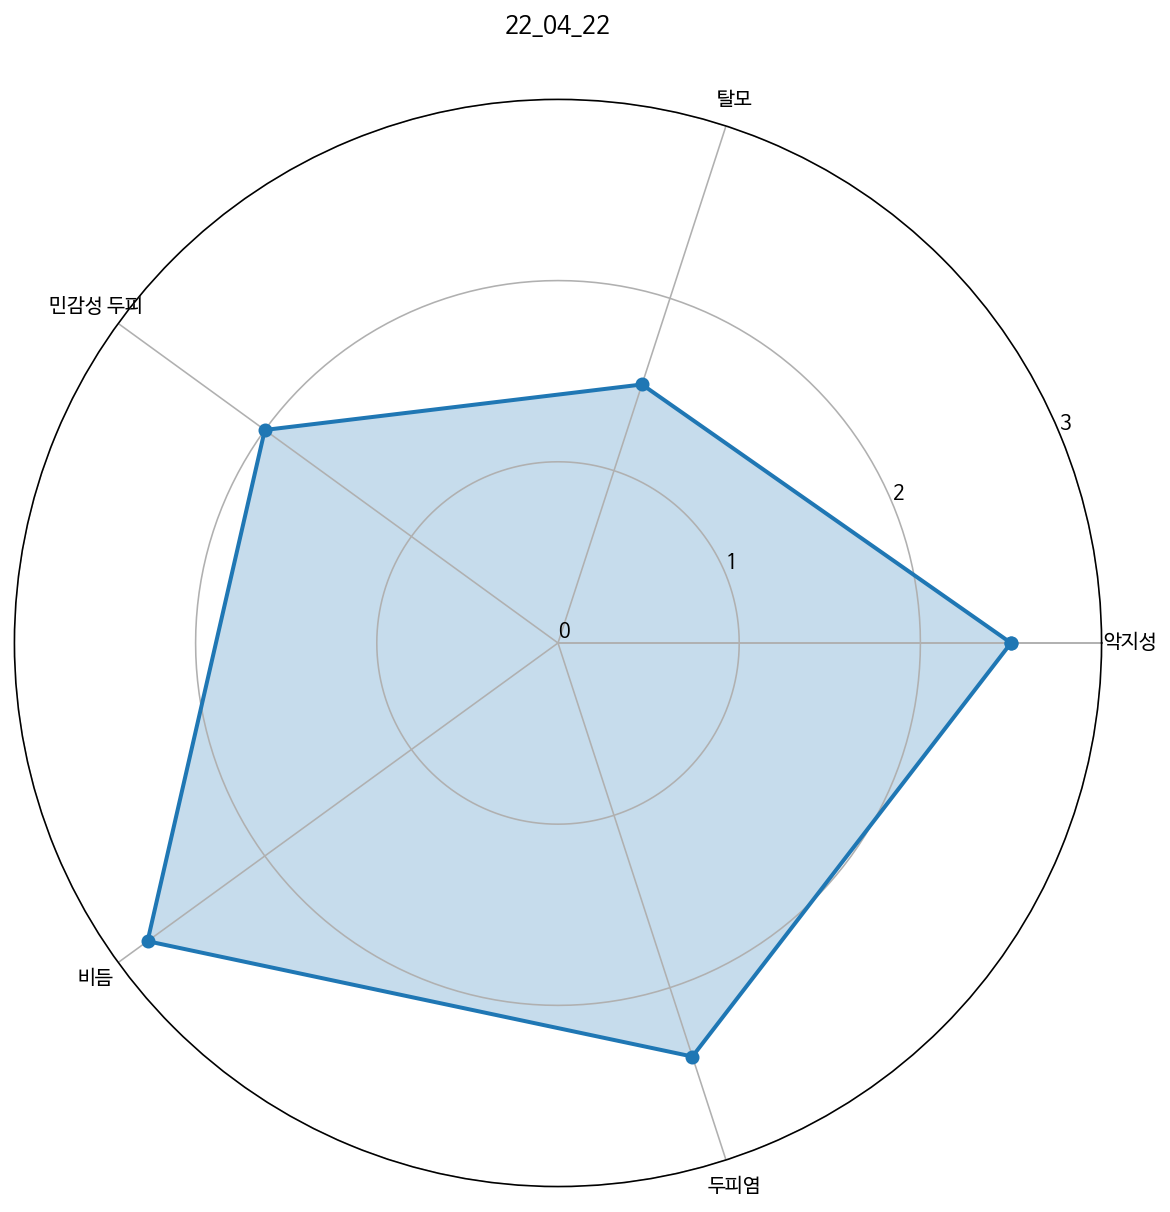

In [ ]:
make_radar_chart(date, final_list) 

In [ ]:
## multiple radar chart
labels= final_index
markers = [0, 1, 2, 3]

def make_radar_multi_chart(name_list, stats_list, attribute_labels=labels,
                     plot_markers=markers):
    colors = ["#FF5A5F", "#FFB400", "#007A87"]
    labels = np.array(attribute_labels)
    fig = plt.figure(figsize = (14,14))
    ax = fig.add_subplot(111, polar=True)
    for idx, stats in enumerate(stats_list):
      angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
      stats = np.concatenate((stats,[stats[0]]))
      angles = np.concatenate((angles,[angles[0]]))
      ax.plot(angles, stats, 'o-', linewidth=2, c = colors[idx])
      ax.fill(angles, stats, alpha=0.25,c = colors[idx])
    # fig = plt.figure(figsize = (14,14))
    # ax = fig.add_subplot(111, polar=True)
    # ax.plot(angles, stats, 'o-', linewidth=2)
    # ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    plt.yticks(markers)
    # ax.set_title(name)
    ax.grid(True)
    ax.legend(name_list)

    fig.savefig("{}_radar_chart_multi.png".format(name_list[-1]))
    # ax.text(0, 0 + 0.05, "양호", size=10)
    # ax.text(-0.4, 0.5 + PAD, "50%", size=16)

    return plt.show()

In [ ]:
# make_radar_multi_chart([22_04_09, 22_05_19], [[1,2,3,2,1],[2,2,1,3,1]])

In [ ]:
print('ㅇㅇ 님의 현재 두피 상태에 맞춰 상품을 추천해 드릴께요. 리뷰수가 많은 제품 중에,평점이 좋은 제품들로 구성해 봤어요.')

ㅇㅇ 님의 현재 두피 상태에 맞춰 상품을 추천해 드릴께요. 리뷰수가 많은 제품 중에,평점이 좋은 제품들로 구성해 봤어요.


In [ ]:
shampoo = pd.read_csv('/content/drive/MyDrive/Final_Project/구세은/shampoo_final.csv')

In [ ]:
shampoo.opinion = shampoo.opinion.str.replace(',', '').astype(int)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# CountVectorizer로 학습시켰더니 366개 샴푸에 대한 44개 스펙의 매트릭스가 생성.
count_vect = CountVectorizer(min_df=0, ngram_range=(1, 1)) 
#min_df: 단어장에 들어갈 최소빈도, ngram_range: 1
specs_mat = count_vect.fit_transform(shampoo['spec_list'])
print(specs_mat.shape)

(366, 37)


In [ ]:
# CountVectorizer 에서 학습한 단어들
count_vect.vocabulary_

{'가는': 0,
 '각질케어': 1,
 '거품': 2,
 '건성': 3,
 '계면활성제': 4,
 '두피샴푸': 5,
 '두피염': 6,
 '드라이샴푸': 7,
 '머릿결개선': 8,
 '모발보호': 9,
 '모발영양': 10,
 '모발용': 11,
 '민감성': 12,
 '볼륨효과': 13,
 '비듬': 14,
 '산성샴푸': 15,
 '상쾌함': 16,
 '샴푸바': 17,
 '세정력': 18,
 '손상': 19,
 '손상케어': 20,
 '실리콘': 21,
 '약산성': 22,
 '염색': 23,
 '웨이브': 24,
 '일반샴푸': 25,
 '중성': 26,
 '지성': 27,
 '천연샴푸': 28,
 '청량감': 29,
 '탈모샴푸': 30,
 '파라벤': 31,
 '패스트샴푸': 32,
 '퍼퓸샴푸': 33,
 '풍부한': 34,
 '프리': 35,
 '한방샴푸': 36}

In [ ]:
# 코사인 유사도에 의해 366개 샴푸 각각 유사한 상품들이 계산됨
from sklearn.metrics.pairwise import cosine_similarity
specs_sim = cosine_similarity(specs_mat, specs_mat)

print(specs_sim.shape)
print(specs_sim[:6])

(366, 366)
[[1.         0.46056619 0.09759001 ... 0.50395263 0.21821789 0.        ]
 [0.46056619 1.         0.13483997 ... 0.63828474 0.20100756 0.40201513]
 [0.09759001 0.13483997 1.         ... 0.17213259 0.1490712  0.1490712 ]
 [0.56694671 0.34815531 0.12909944 ... 0.66666667 0.         0.28867513]
 [0.40089186 0.49236596 0.45643546 ... 0.47140452 0.20412415 0.40824829]
 [0.40089186 0.73854895 0.31950483 ... 0.41247896 0.40824829 0.20412415]]


In [ ]:
# 자료를 정렬하는 것이 아니라 순서만 알고 싶다면 argsort
# 유사도가 높은 영화를 앞에서부터 순서대로 보여줌
# 0번째 영화의 경우 유사도 순서 : 0번, 3494번, 813번, ..., 2401 순서
specs_sim_sorted_ind = specs_sim.argsort()[:, ::-1] # 전체를 -1칸 간격으로
print(specs_sim_sorted_ind[:5])

[[  0  69  39 ... 187 194 365]
 [  1 139 275 ... 289 147 290]
 [  2 274 154 ... 294 124 239]
 [  3 341 356 ... 289 226 287]
 [  4  85 121 ...  60 313 268]]


In [ ]:
final_keyword3

['지성', '민감성', '비듬', '두피염']

In [ ]:
# # 두피 유형(Type) 입력시 : 리뷰수, 평점 4.6이상, 상위 10개 항목 출력
# def recommend(Type) :
#     result = shampoo[shampoo['spec_list'].str.contains(Type)]
#     result = result[result['rate'] > 4.6]
#     result.sort_values('opinion', ascending = False, inplace = True, ignore_index = True)
#     return result[:10]

In [ ]:
# 두피 유형(Type) 입력시 : 리뷰수, 평점 4.6이상, 상위 10개 항목 출력
def recommend(final_keyword) :

    result = shampoo[shampoo['spec_list'].apply(lambda words: all(word in words for word in final_keyword))]
    result = result[result['rate'] > 4.6]
    result.sort_values(['rate','opinion'], ascending = False, ignore_index = True, inplace = True)
    # result = result.sort_values(by = 'price', ascending = False, ignore_index = True)
    return result[:10]

In [ ]:
# # 두피 유형(Type) 입력시 : 리뷰수, 평점 4.6이상, 상위 10개 항목 출력
# def recommend(final_keyword) :

#     result = shampoo[shampoo['spec_list'].apply(lambda words: any(word in words for word in final_keyword))]
#     result = result[result['rate'] > 4.6]
#     result.sort_values('opinion', ascending = False, inplace = True, ignore_index = True)
#     return result[:10]

In [ ]:
recommend(final_keyword3)

,Unnamed: 0,title,spec_list,price,rate,opinion
0,145,솔랩 퓨어 테라피 지성 샴푸 300ml,"지성', '민감성', '두피염/두피염', '중성', '일반샴푸', '천연샴푸', '...","25,000원",5.0,510
1,12,닥터모두 좋은 스칼프 샴푸 500ml,"지성', '건성', '민감성', '두피염/두피염', '중성', '일반샴푸', '탈모...","24,000원",4.9,3811
2,27,닥터포헤어 피토 테라피 두피샴푸 500ml,"지성', '건성', '민감성', '두피염/두피염', '중성', '일반샴푸', '천연...","13,450원",4.7,6852
3,1,제이숲 딥그린제이 아로마 샴푸 일랑일랑 1000ml,"지성', '건성', '민감성', '중성', '일반샴푸', '패스트샴푸', '천연샴푸...","14,900원",4.7,3307
4,345,닥터포헤어 세범 컨트롤 지성 샴푸 500ml,"지성', '건성', '민감성', '중성', '일반샴푸', '비듬', '산성샴푸', ...","19,800원",4.7,1876
5,200,박준 애씨드 산성 샴푸 1500ml,"지성', '건성', '민감성', '두피염/두피염', '가는 모발용', '염색 모발용...","16,900원",4.7,1401
6,346,바론 모링가 리프레쉬 샴푸 1000g,"지성', '중성', '일반샴푸', '비듬', '두피샴푸', '머릿결개선', '세정력...","13,190원",4.7,1145
7,129,앙방 약산성 퍼퓸 샴푸 체리블라썸 550ml,"지성', '건성', '민감성', '중성', '일반샴푸', '탈모샴푸', '천연샴푸'...","19,900원",4.7,609
8,40,비바스 오리진 아이슬란드 쿨링 샴푸 1000ml,"중성', '일반샴푸', '비듬', '두피샴푸', '머릿결개선', '세정력', '풍부...","9,860원",4.7,556


In [ ]:
recommend(['민감성'])

,Unnamed: 0,title,spec_list,price,rate,opinion
0,354,발머스 M 샴푸 300ml,"중성', '민감성', '건성(수분공급)'","28,000원",4.8,967
1,343,쿤달 허니 앤 마카다미아 네이처 샴푸 화이트 머스크 1058ml,"중성', '일반샴푸', '머릿결개선', '세정력', '풍부한 거품', '향', '민...","15,900원",4.8,933
2,165,마녀공장 허브그린 샴푸 1000ml,"중성', '일반샴푸', '세정력', '풍부한 거품', '향', '상쾌함', '민감성...","16,400원",4.7,930
3,8,더나플러스 그린테라피 샴푸 500ml,"중성', '탈모샴푸', '머릿결개선', '세정력', '민감성', '두피염', '계면...","37,110원",4.9,922
4,281,케라시스 러블리 앤 로맨틱 퍼퓸 샴푸 980ml,"중성', '일반샴푸', '머릿결개선', '세정력', '풍부한 거품', '향', '민...","4,900원",4.7,89
5,263,케라시스 두피 프레쉬 쿨 샴푸 750ml,"지성', '건성', '민감성', '가는 모발용', '염색 모발용', '웨이브 모발용...","2,880원",4.7,861
6,342,무백 자몽 워터 샴푸 500ml,"중성', '일반샴푸', '머릿결개선', '세정력', '풍부한 거품', '향', '민...","16,200원",4.8,859
7,161,케라시스 프로폴리스 에너지 플러스 샴푸 1000ml,"지성', '건성', '민감성', '가는 모발용', '염색 모발용', '웨이브 모발용...","4,890원",4.7,842
8,33,커리쉴 모이스처 카밍 샴푸 330ml,"중성', '일반샴푸', '머릿결개선', '세정력', '풍부한 거품', '향', '상...","17,560원",4.9,831
9,93,케라시스 샤이닝 데미지 케어 샴푸 4000ml,"지성', '건성', '민감성', '가는 모발용', '염색 모발용', '웨이브 모발용...","9,960원",4.7,"8,003"
